# Oscillation in eeg 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import scipy as sp
import numpy as np 


import mne 

warnings.filterwarnings('ignore')

In [3]:
sampling_rate = 250 # in seconds
time = 1/sampling_rate
unit_time = 's'

In [4]:
df = pd.read_csv('../../data/EEGArchi13mPFC.txt')
# df = df.iloc[int(start*20_000):int(end*20_000)] 
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)
# plt.plot(df['time'], df['µV'])
# plt.xlabel(f'time ({unit_time})')
# plt.ylabel('µV')
# plt.title('EEG signal on the first 3000 rows')
# # plt.savefig("./figures/EEG_signal_all_data.png")
# plt.show()

## 1 Plot on the first part of the experiment (before the gap)

In [5]:
def four_s_cutting(path = '../../data/EEGArchi13mPFC.txt') : 
    df = pd.read_csv(path)
    df['time'] = df.index * time
    df.rename(columns={'0': 'mV'}, inplace=True)
    df = df.iloc[int(0*sampling_rate):int(2500*sampling_rate)]
    res = []
    for i in range(0,len(df),1000) :
        try : 
            df_red = df.iloc[i:i+1000]
        except : 
            df_red = df.iloc[i:]

        res.append(df_red)
    return res

data_cut = four_s_cutting()
data = np.array([data_cut[i]["mV"] for i in range(len(data_cut))]) ## All the data
info = mne.create_info(ch_names=['eeg']*len(data),
                       ch_types=['eeg']*len(data),
                       sfreq=sampling_rate)

simulated_raw = mne.io.RawArray(data, info)

power = simulated_raw.compute_psd()
frequencies = np.arange(0, 120, 0.935)
htmap = pd.DataFrame(power[0])
htmap = htmap.T
for i in range(1,len(data)) : 
    htmap[i] = power[i][0]
htmap = htmap.rename(columns=dict((i,i*4) for i in range(len(data))))
htmap
htmap["freq"] = frequencies
htmap = htmap.set_index("freq", drop=True)

Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
Effective window size : 1.024 (s)


In [6]:
multiple_lists = [htmap.iloc[[0]].values.flatten().tolist(), htmap.iloc[[1]].values.flatten().tolist(), htmap.iloc[[2]].values.flatten().tolist(), htmap.iloc[[3]].values.flatten().tolist(), htmap.iloc[[4]].values.flatten().tolist(), htmap.iloc[[5]].values.flatten().tolist()]
arrays = [np.array(x) for x in multiple_lists]
List05 = [np.mean(k) for k in zip(*arrays)]

In [7]:
multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(6, 14)]
arrays = [np.array(x) for x in multiple_lists]
List512 = [np.mean(k) for k in zip(*arrays)]

In [8]:
multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(14, 34)]
arrays = [np.array(x) for x in multiple_lists]
List1230 = [np.mean(k) for k in zip(*arrays)]

In [9]:
multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(34, 129)]
arrays = [np.array(x) for x in multiple_lists]
List30 = [np.mean(k) for k in zip(*arrays)]

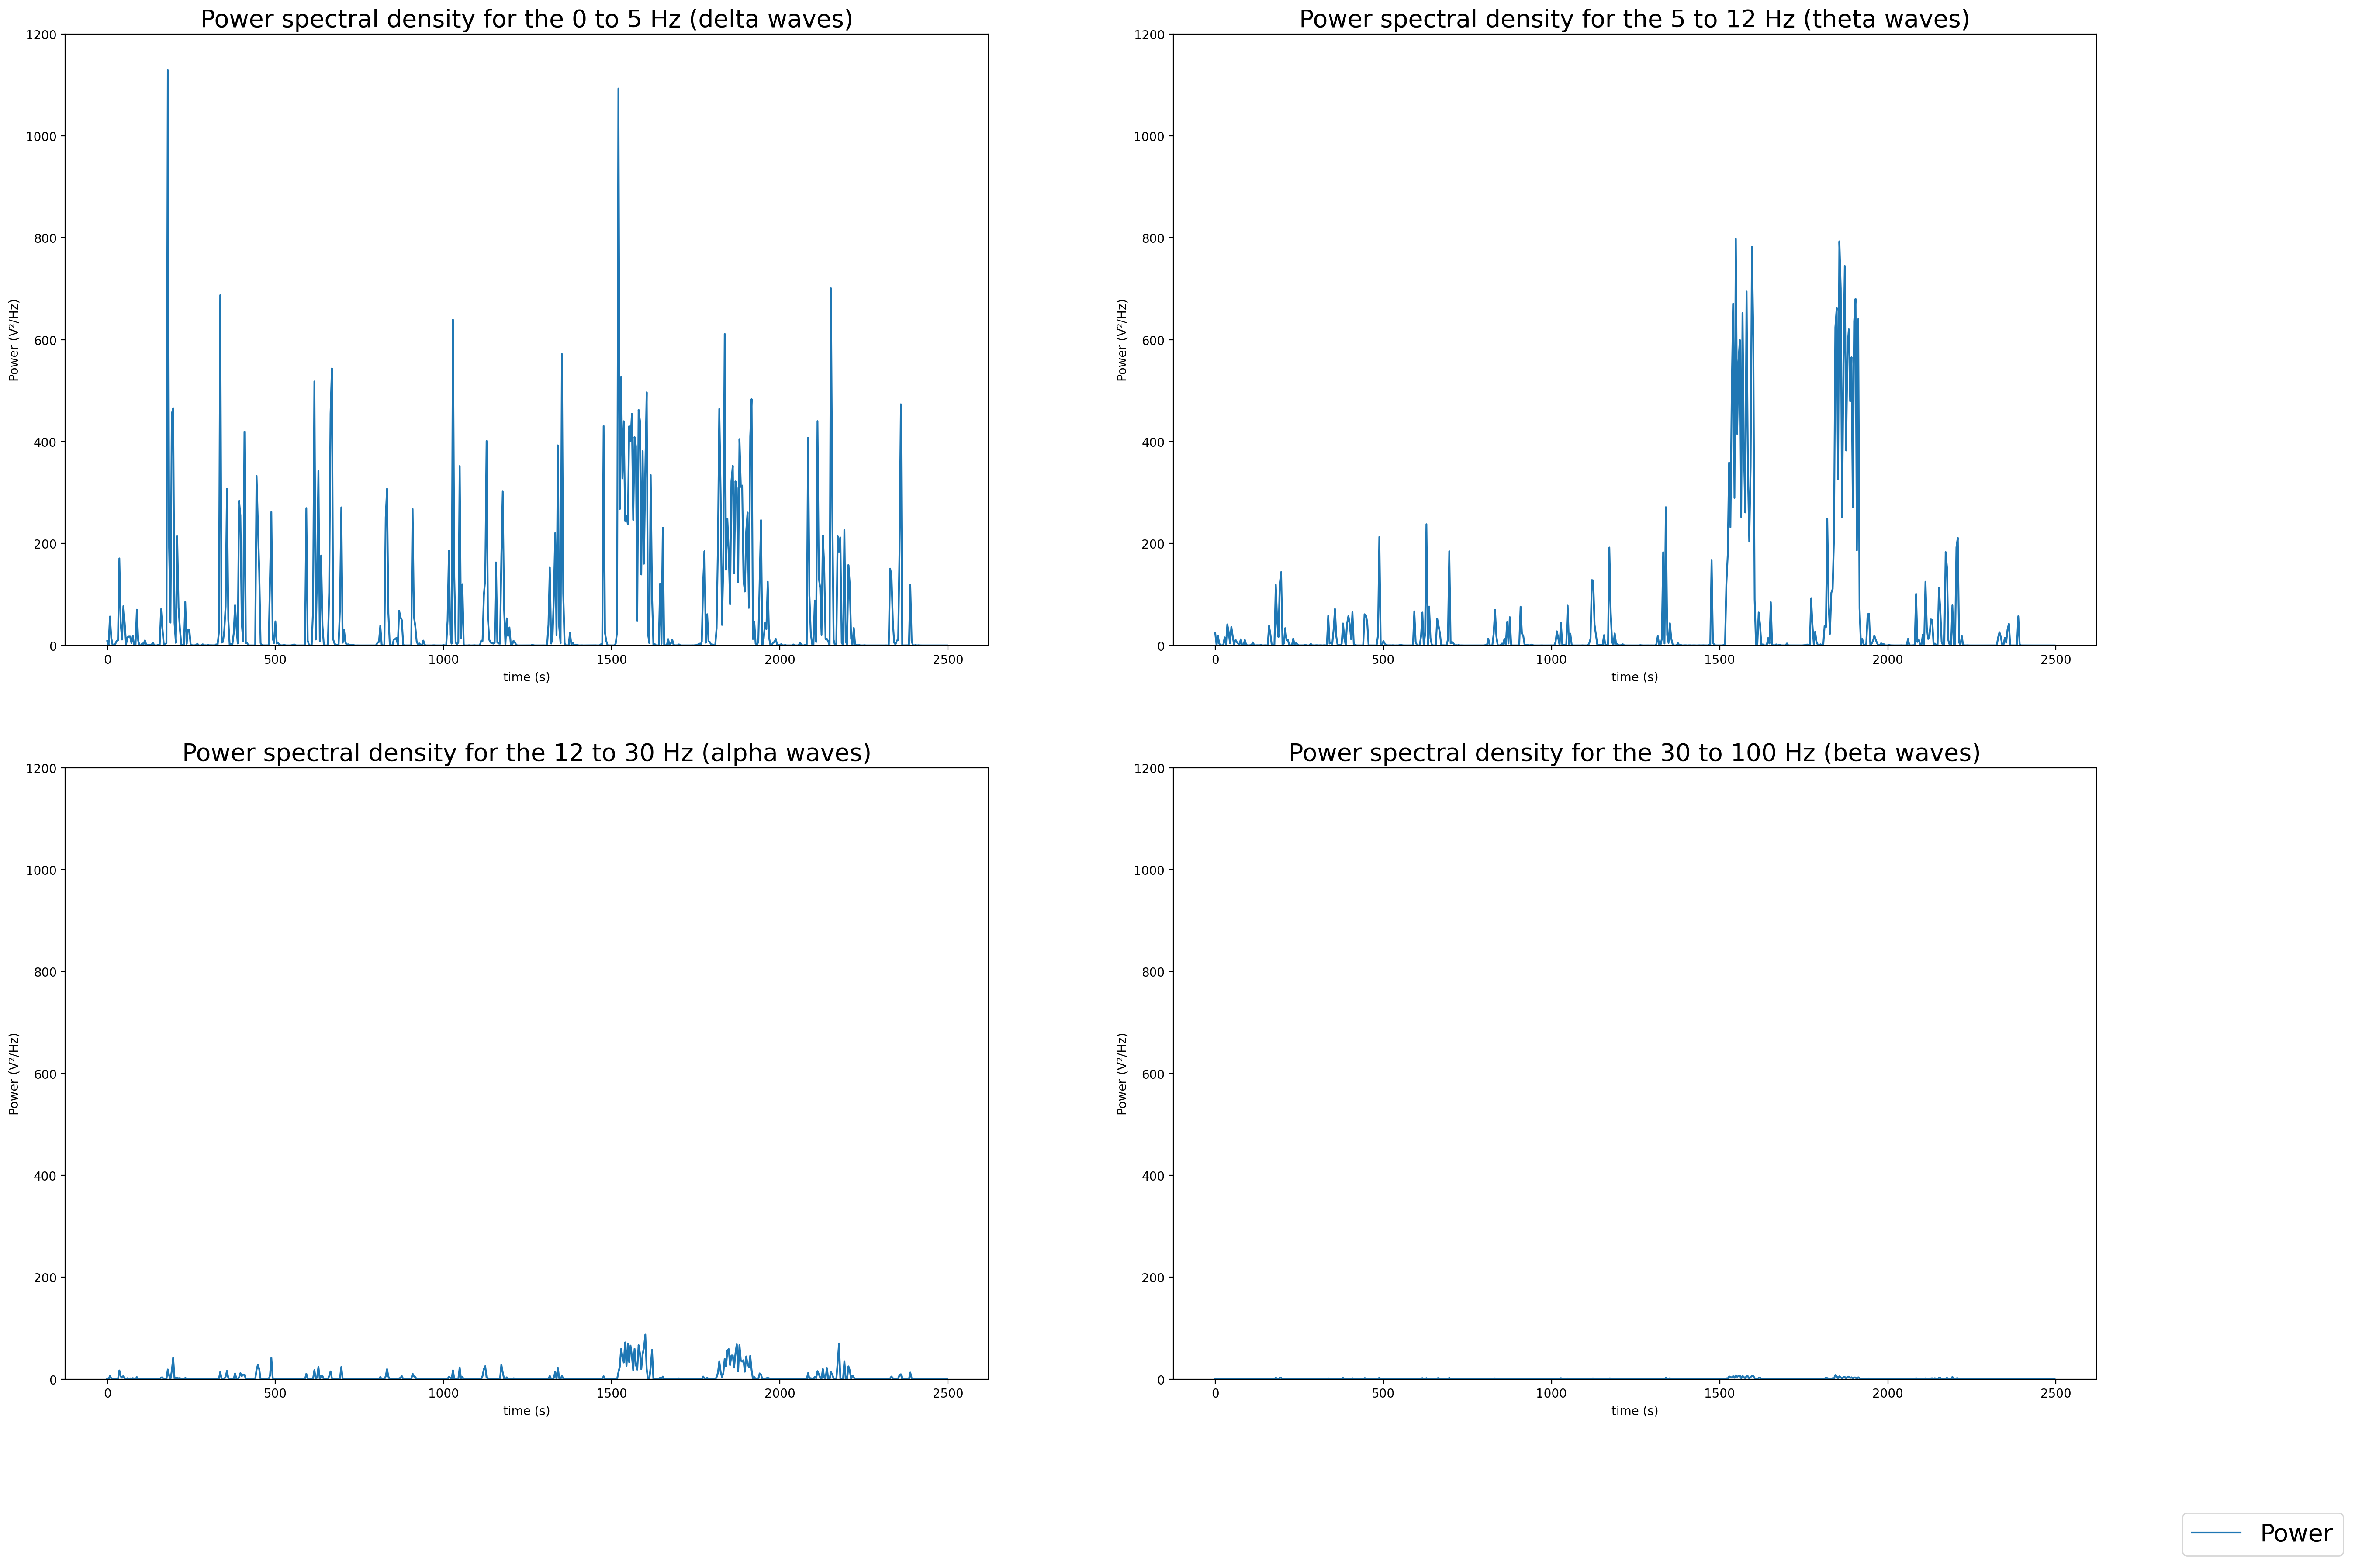

In [10]:
plt.close('all')
fig,ax = plt.subplots(2,2, figsize=(30,20), dpi = 200)
ax[0,0].plot(htmap.columns.tolist(), List05)
ax[0,0].set_xlabel('time (s)')
ax[0,0].set_ylabel('Power (V\u00b2/Hz)')
ax[0,0].set_ylim(0, 1200)
ax[0,0].set_title("Power spectral density for the 0 to 5 Hz (delta waves)",fontsize=20)

ax[0,1].plot(htmap.columns.tolist(), List512)
ax[0,1].set_ylim(0, 1200)
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('Power (V\u00b2/Hz)')
ax[0,1].set_title("Power spectral density for the 5 to 12 Hz (theta waves)",fontsize=20)

ax[1,0].plot(htmap.columns.tolist(), List1230)
ax[1,0].set_ylim(0, 1200)
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('Power (V\u00b2/Hz)')
ax[1,0].set_title("Power spectral density for the 12 to 30 Hz (alpha waves)",fontsize=20)

ax[1,1].plot(htmap.columns.tolist(), List30)
ax[1,1].set_ylim(0, 1200)
ax[1,1].set_xlabel('time (s)')
ax[1,1].set_ylabel('Power (V\u00b2/Hz)')
ax[1,1].set_title("Power spectral density for the 30 to 100 Hz (beta waves)",fontsize=20)
fig.legend(['Power'], loc='lower right', fontsize=20)
plt.savefig('figures/2_PSD_sess1.png')
plt.show()

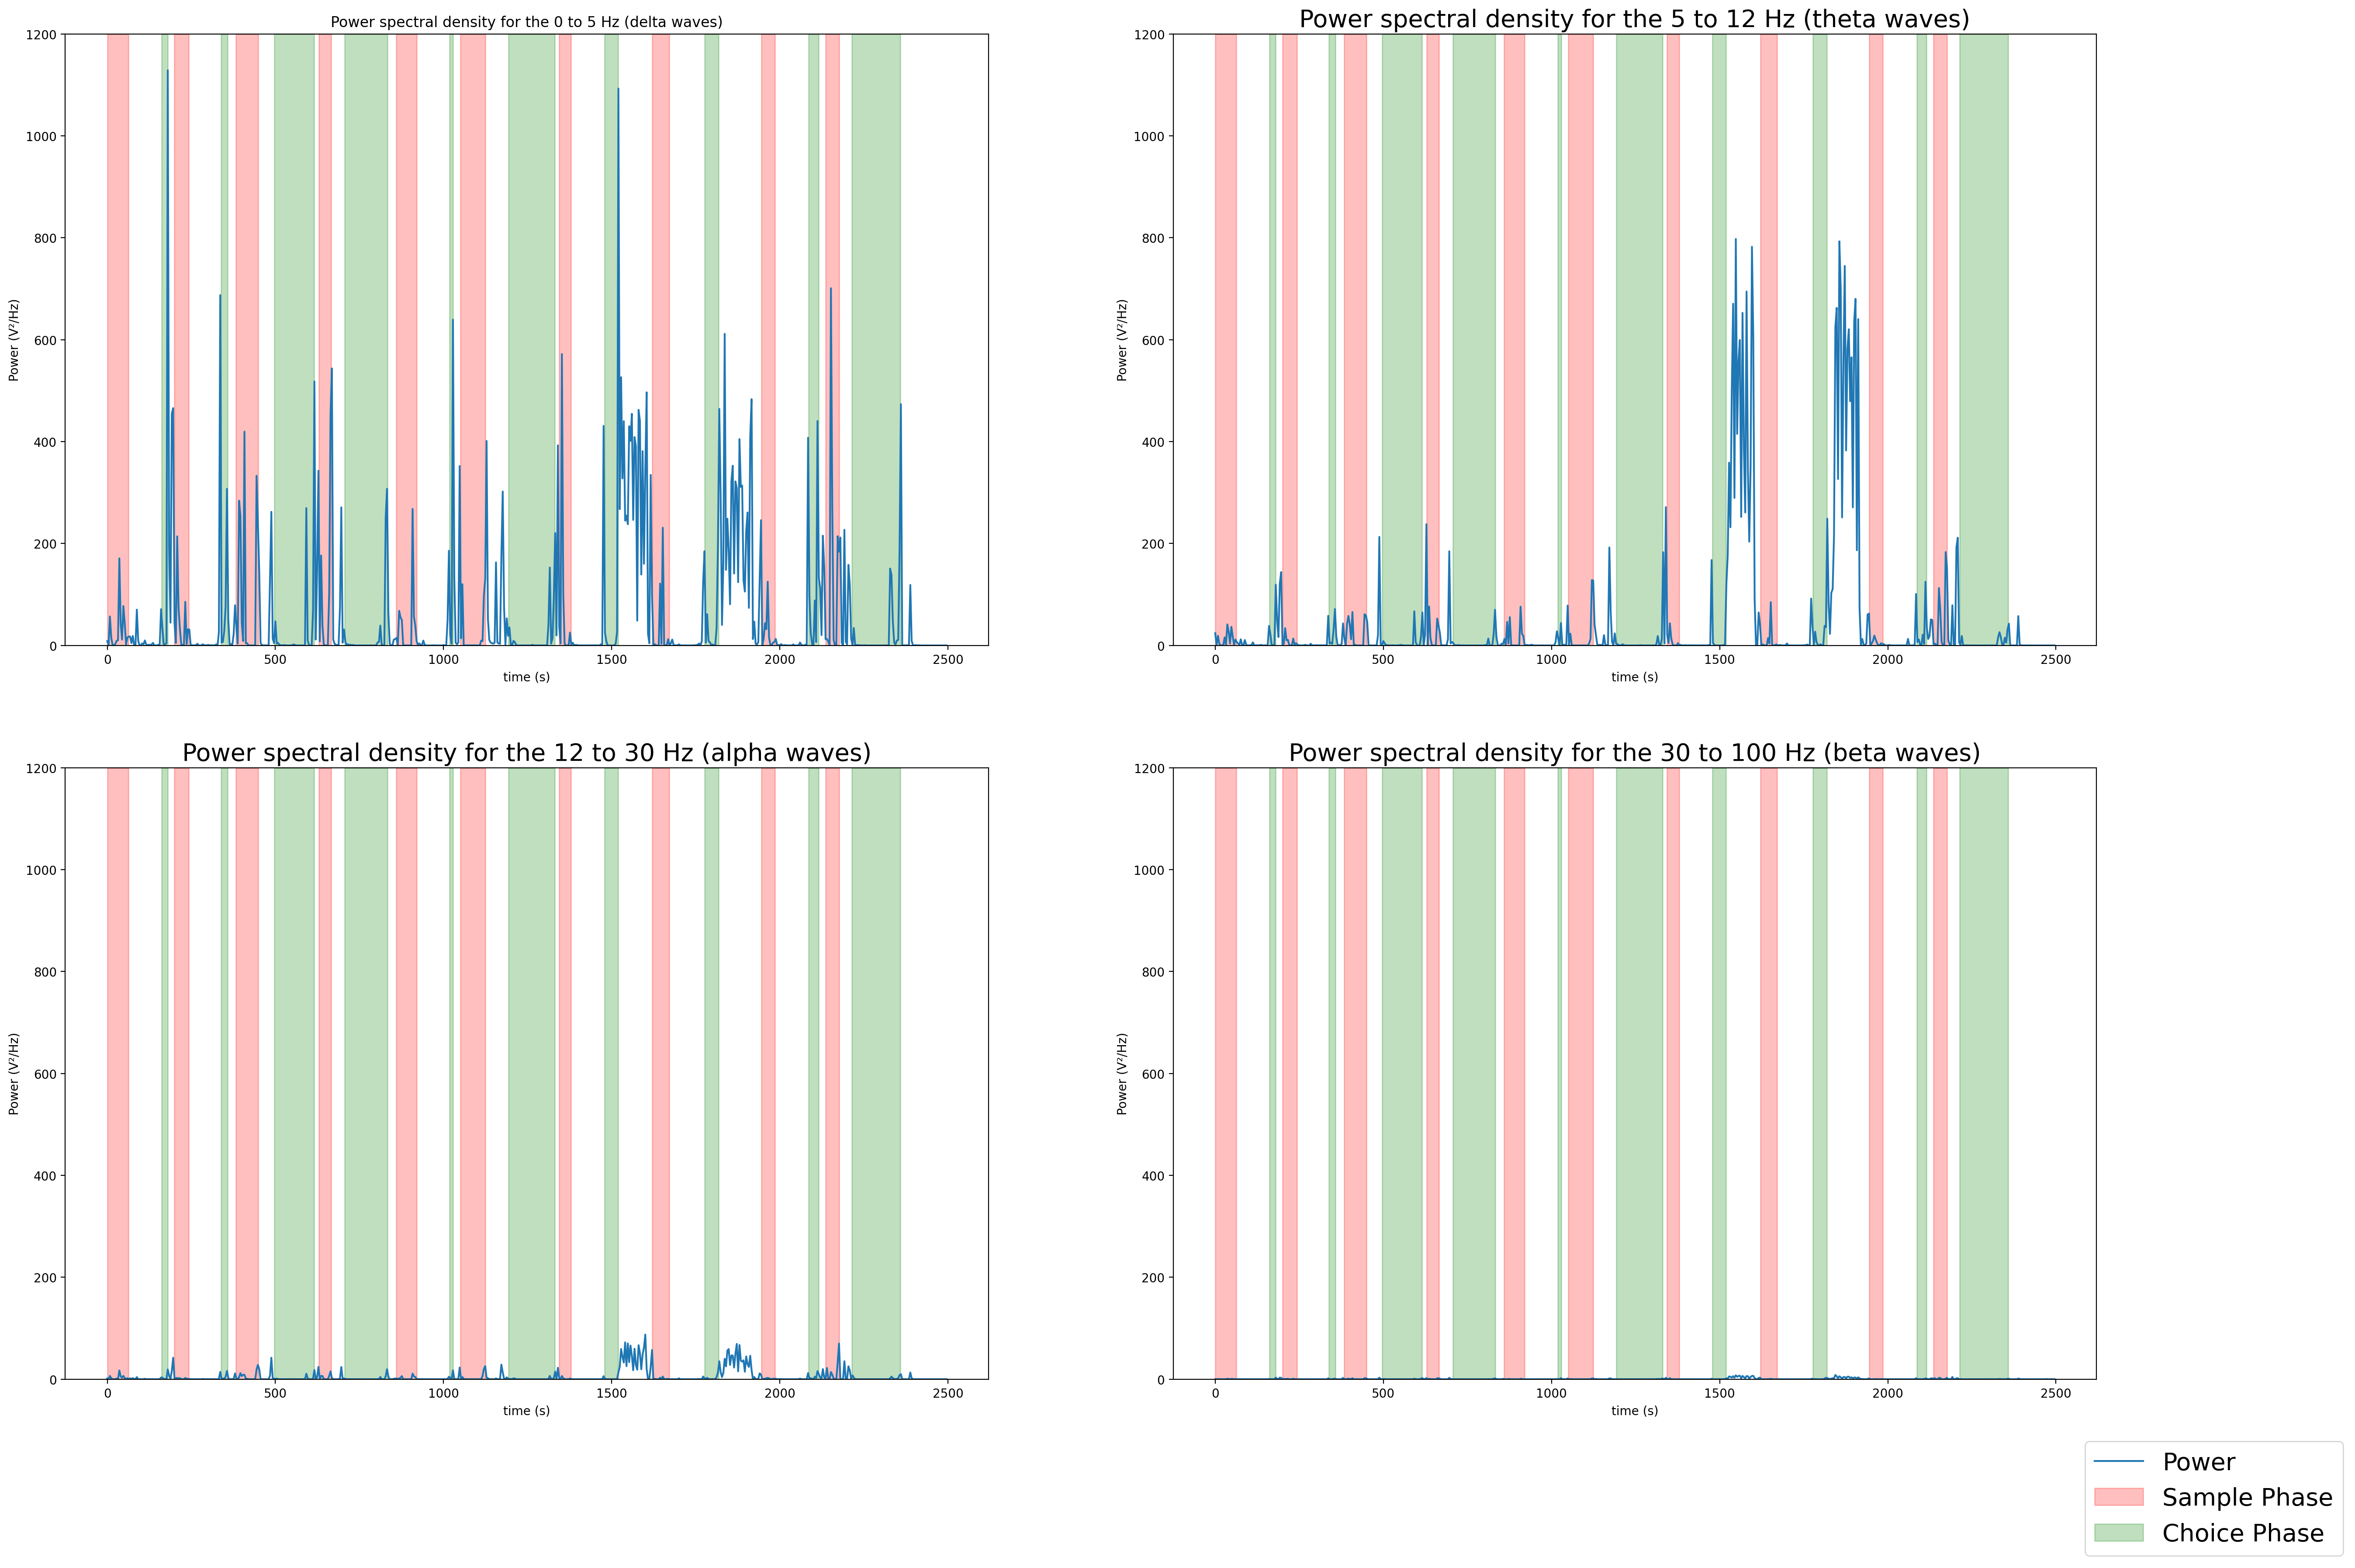

In [12]:
plt.close('all')
sampleStart = [int(_) for _ in [0.02, 199.78, 382.94, 629.5, 859.06, 1049.9, 1343.58, 1620.9, 1945.08, 2135.96]]
sampleEnd = [int(_) for _ in [161.32, 338.2, 496.86, 706.52, 1018.4, 1193.28, 1478.86, 1776.84, 2086.1, 2214.0,]]
samplePhase = [(0.02, 62.78), (199.78, 242.64), (382.94, 449.02), (629.5, 665.46), (859.06, 920.34), (1049.9, 1123.96), (1343.58, 1379.16), (1620.9, 1671.3), (1945.08, 1985.68), (2135.96, 2176.46)]
choicePhase = [(161.32, 179.6), (338.2, 358.0), (496.86, 614.74), (706.52, 832.84), (1018.4, 1028.72), (1193.28, 1330.66), (1478.86, 1519.26), (1776.84, 1818.26), (2086.1, 2115.04), (2214.0, 2358.0)]

fig,ax = plt.subplots(2,2, figsize=(30,20), dpi = 200)
ax[0,0].plot(htmap.columns.tolist(), List05, label='Power')
for sample in samplePhase :
    if sample == samplePhase[0] : 
        ax[0,0].axvspan(sample[0], sample[1], alpha=0.25, color='red', label='Sample Phase')
    else :
        ax[0,0].axvspan(sample[0], sample[1], alpha=0.25, color='red', )

for choice in choicePhase :
    if choice == choicePhase[0] :
        ax[0,0].axvspan(choice[0],choice[1] ,alpha=0.25, color='green', label='Choice Phase')
    else :
        ax[0,0].axvspan(choice[0],choice[1] ,alpha=0.25, color='green',)

ax[0,0].set_xlabel('time (s)')
ax[0,0].set_ylabel('Power (V\u00b2/Hz)')
ax[0,0].set_ylim(0, 1200)
ax[0,0].set_title("Power spectral density for the 0 to 5 Hz (delta waves)",)

ax[0,1].plot(htmap.columns.tolist(), List512)
for sample in samplePhase :
    ax[0,1].axvspan(sample[0], sample[1], alpha=0.25, color='red',  )

for choice in choicePhase :
    ax[0,1].axvspan(choice[0],choice[1] ,alpha=0.25, color='green',)

ax[0,1].set_ylim(0, 1200)
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('Power (V\u00b2/Hz)')
ax[0,1].set_title("Power spectral density for the 5 to 12 Hz (theta waves)",fontsize=20)

ax[1,0].plot(htmap.columns.tolist(), List1230)
for sample in samplePhase :

    ax[1,0].axvspan(sample[0], sample[1], alpha=0.25, color='red',  )

for choice in choicePhase :
    ax[1,0].axvspan(choice[0],choice[1] ,alpha=0.25, color='green',)
ax[1,0].set_ylim(0, 1200)
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('Power (V\u00b2/Hz)')
ax[1,0].set_title("Power spectral density for the 12 to 30 Hz (alpha waves)",fontsize=20)

ax[1,1].plot(htmap.columns.tolist(), List30)
for sample in samplePhase :
    ax[1,1].axvspan(sample[0], sample[1], alpha=0.25, color='red',  )

for choice in choicePhase :
    ax[1,1].axvspan(choice[0],choice[1] ,alpha=0.25, color='green',)

ax[1,1].set_ylim(0, 1200)
ax[1,1].set_xlabel('time (s)')
ax[1,1].set_ylabel('Power (V\u00b2/Hz)')
ax[1,1].set_title("Power spectral density for the 30 to 100 Hz (beta waves)",fontsize=20)
fig.legend(loc='lower right', fontsize=20)
plt.savefig('figures/2_PSD_sess1_sample_choice.png')
plt.show()